In [23]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
#Exploratory Climate Analysis

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column
print(results.all())
# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date','precipitation'])
# Use Pandas Plotting with Matplotlib to plot the data

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [31]:
df.set_index(df['date'], inplace=True)

In [32]:
print(df)

                  date  precipitation
date                                 
2010-01-01  2010-01-01           0.08
2010-01-02  2010-01-02           0.00
2010-01-03  2010-01-03           0.00
2010-01-04  2010-01-04           0.00
2010-01-06  2010-01-06            NaN
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[19550 rows x 2 columns]


In [33]:
print(df.to_string(index=False))

       date  precipitation
 2010-01-01           0.08
 2010-01-02           0.00
 2010-01-03           0.00
 2010-01-04           0.00
 2010-01-06            NaN
 2010-01-07           0.06
 2010-01-08           0.00
 2010-01-09           0.00
 2010-01-10           0.00
 2010-01-11           0.01
 2010-01-12           0.00
 2010-01-14           0.00
 2010-01-15           0.00
 2010-01-16           0.00
 2010-01-17           0.00
 2010-01-18           0.00
 2010-01-19           0.00
 2010-01-20           0.00
 2010-01-21           0.00
 2010-01-22           0.00
 2010-01-23           0.00
 2010-01-24           0.01
 2010-01-25           0.00
 2010-01-26           0.04
 2010-01-27           0.12
 2010-01-28           0.00
 2010-01-30            NaN
 2010-01-31           0.03
 2010-02-01           0.01
 2010-02-03            NaN
 2010-02-04           0.01
 2010-02-05           0.00
 2010-02-06           0.00
 2010-02-07           0.00
 2010-02-08           0.00
 2010-02-09           0.00
 

In [34]:
df = df.sort_index()

In [35]:
print(df.to_string(index=False))

       date  precipitation
 2010-01-01           0.08
 2010-01-01           0.21
 2010-01-01           0.15
 2010-01-01           0.15
 2010-01-01           0.05
 2010-01-01           0.14
 2010-01-01           0.28
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-02           0.02
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.01
 2010-01-05           0.00
 2010-01-05           0.00
 2010-01-05           0.02
 2010-01-05           0.00
 2010-01-05           0.00
 2010-01-05           0.01
 2010-01-06           0.08
 2010-01-06           0.01
 

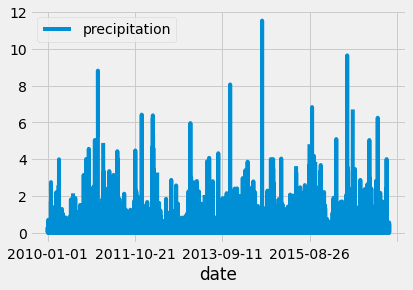

In [36]:
df.plot()

In [37]:
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


## D1: Determine the Summary Statistics for June

In [49]:
session.query()

In [50]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

In [51]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')

In [52]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [53]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_start = dt.date(2010, 6, 1)
# Calculate the date one year from the last date in data set.
june_end = dt.date(2018, 6, 30) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.tobs)
# Save the query results as a Pandas DataFrame and set the index to the date column
print(results.all())
# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date','temperature'])
# Use Pandas Plotting with Matplotlib to plot the data

[('2010-01-01', 65.0), ('2010-01-02', 63.0), ('2010-01-03', 74.0), ('2010-01-04', 76.0), ('2010-01-06', 73.0), ('2010-01-07', 70.0), ('2010-01-08', 64.0), ('2010-01-09', 68.0), ('2010-01-10', 73.0), ('2010-01-11', 64.0), ('2010-01-12', 61.0), ('2010-01-14', 66.0), ('2010-01-15', 65.0), ('2010-01-16', 68.0), ('2010-01-17', 64.0), ('2010-01-18', 72.0), ('2010-01-19', 66.0), ('2010-01-20', 66.0), ('2010-01-21', 69.0), ('2010-01-22', 67.0), ('2010-01-23', 67.0), ('2010-01-24', 71.0), ('2010-01-25', 67.0), ('2010-01-26', 76.0), ('2010-01-27', 68.0), ('2010-01-28', 72.0), ('2010-01-30', 70.0), ('2010-01-31', 67.0), ('2010-02-01', 66.0), ('2010-02-03', 67.0), ('2010-02-04', 69.0), ('2010-02-05', 67.0), ('2010-02-06', 67.0), ('2010-02-07', 64.0), ('2010-02-08', 69.0), ('2010-02-09', 73.0), ('2010-02-11', 73.0), ('2010-02-12', 69.0), ('2010-02-13', 69.0), ('2010-02-14', 69.0), ('2010-02-15', 71.0), ('2010-02-16', 61.0), ('2010-02-17', 69.0), ('2010-02-19', 63.0), ('2010-02-20', 64.0), ('2010-02

In [59]:
#  3. Convert the June temperatures to a list.
session.query(Measurement.tobs, Measurement.date)

In [64]:
results = session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.station == 'USC00519281')

In [67]:
results = session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [68]:
print(results)

[(77.0, '2016-08-23'), (77.0, '2016-08-24'), (80.0, '2016-08-25'), (80.0, '2016-08-26'), (75.0, '2016-08-27'), (73.0, '2016-08-28'), (78.0, '2016-08-29'), (77.0, '2016-08-30'), (78.0, '2016-08-31'), (80.0, '2016-09-01'), (80.0, '2016-09-02'), (78.0, '2016-09-03'), (78.0, '2016-09-04'), (78.0, '2016-09-05'), (73.0, '2016-09-06'), (74.0, '2016-09-07'), (80.0, '2016-09-08'), (79.0, '2016-09-09'), (77.0, '2016-09-10'), (80.0, '2016-09-11'), (76.0, '2016-09-12'), (79.0, '2016-09-13'), (75.0, '2016-09-14'), (79.0, '2016-09-15'), (78.0, '2016-09-16'), (79.0, '2016-09-17'), (78.0, '2016-09-18'), (78.0, '2016-09-19'), (76.0, '2016-09-20'), (74.0, '2016-09-21'), (77.0, '2016-09-22'), (78.0, '2016-09-23'), (79.0, '2016-09-24'), (79.0, '2016-09-25'), (77.0, '2016-09-26'), (80.0, '2016-09-27'), (78.0, '2016-09-28'), (78.0, '2016-09-29'), (78.0, '2016-09-30'), (77.0, '2016-10-01'), (79.0, '2016-10-02'), (79.0, '2016-10-03'), (79.0, '2016-10-04'), (79.0, '2016-10-05'), (75.0, '2016-10-06'), (76.0, '2

In [73]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

In [103]:
june_start = dt.date(2010, 6, 1)
june_end = dt.date(2017, 6, 30)

results = []

results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= june_start).\
                        filter(Measurement.date <= june_end).all()
temp_df = pd.DataFrame(results, columns=['date', 'tobs'])

In [104]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temp_df.describe()

,tobs
count,18187.000000
mean,73.169132
std,4.469392
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


## D2: Determine the Summary Statistics for December

In [107]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_start = dt.date(2010, 12, 1)
dec_end = dt.date(2017, 12, 30)

In [108]:
# 7. Convert the December temperatures to a list.
results = []

results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= dec_start).\
                        filter(Measurement.date <= dec_end).all()

In [109]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temp_dec_df = pd.DataFrame(results, columns=['date', 'tobs'])

In [110]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temp_dec_df.describe()

,tobs
count,17001.000000
mean,73.156638
std,4.584538
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000
